In [6]:
import math
import numpy as np
import pandas as pd
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from sklearn.svm import SVC

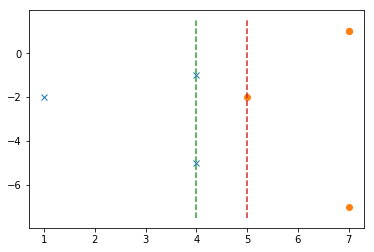

In [2]:
# Q2
X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
Y = np.array([-1, -1, -1, 1, 1, 1, 1])
row, col = X.shape
z = np.zeros(X.shape)
z[:, 0] = X[:, 1]**2-2*X[:, 0]+3
z[:, 1] = X[:, 0]**2-2*X[:, 1]-3
pos1 = Y == -1; pos2 = Y == 1
l1x = [4, 4]; l1y = [-7.5, 1.5]
l2x = [5, 5]; l2y = [-7.5, 1.5]
plt.plot(z[pos1, 0], z[pos1, 1], 'x', z[pos2, 0], z[pos2, 1], 'o')
plt.plot(l1x, l1y, '--',l2x, l2y, '--')
plt.show()

In [3]:
# Q3 ---C无穷大代表Hard-margin情况
clf = SVC(C=1e20, kernel='poly', degree=2, gamma=1, coef0=1, shrinking=False)
clf.fit(X, Y)
print('支撑向量对应下标：',clf.support_, '\n对应的alpha*y：', clf.dual_coef_,'\n b: ',clf.intercept_)

支撑向量对应下标： [1 2 3 4 5] 
对应的alpha*y： [[-0.64491963 -0.76220325  0.88870349  0.22988879  0.2885306 ]] 
 b:  [-1.66633141]


In [5]:
# Q4
Xtrans = np.zeros((7, 5))
Xtrans[:, 0] = np.ones((7,))
Xtrans[:, 1] = math.sqrt(2)*X[:, 0]
Xtrans[:, 2] = math.sqrt(2)*X[:, 1]
Xtrans[:, 3] = X[:, 0]**2
Xtrans[:, 4] = X[:, 1]**2
G = (-1*Xtrans.T*Y).T
P = np.zeros((5, 5)); P[1:, 1:] = np.eye(4)
q = np.zeros((5, 1))
h = -1*np.ones((7, 1))
G = matrix(G); P = matrix(P); q = matrix(q); h = matrix(h)
sol = solvers.qp(P, q, G, h)
print('对应的参数为： ',sol['x'].T)

     pcost       dcost       gap    pres   dres
 0:  1.8445e-01  4.8307e+00  2e+01  2e+00  1e+01
 1:  1.6711e+00  4.7954e-01  5e+00  6e-01  3e+00
 2:  2.0952e+00  1.2189e+00  9e-01  4e-16  1e-15
 3:  1.4261e+00  1.3986e+00  3e-02  4e-16  6e-16
 4:  1.4076e+00  1.4073e+00  3e-04  1e-16  2e-15
 5:  1.4074e+00  1.4074e+00  3e-06  4e-16  2e-15
 6:  1.4074e+00  1.4074e+00  3e-08  1e-16  2e-15
Optimal solution found.
对应的参数为：  [-1.67e+00 -1.26e+00  5.58e-18  8.89e-01  6.67e-01]



In [7]:
# Q15~Q20
# 加载数据函数
def loadData(filename):
    data = pd.read_csv(filename, sep='\s+', header=None)
    data = data.as_matrix()
    col, row = data.shape
    X = np.c_[np.ones((col, 1)), data[:, 1: row]]
    Y = data[:, 0]
    return X, Y

In [8]:
# 误差计算函数
def mistake(yhat, y):
    err = np.sum(yhat != y)/len(y)
    return err

In [9]:
# 导入数据
X, Y = loadData('features_train.dat')
Xtest, Ytest = loadData('features_test.dat')
row, col = X.shape

In [11]:
# Q15
Ytemp = Y.copy()
pos1 = Ytemp == 0; pos2 = Ytemp != 0
Ytemp[pos1] = 1; Ytemp[pos2] = -1
clf = SVC(C=0.01, kernel='linear', shrinking=False)
clf.fit(X, Ytemp)
print('w: ', clf.coef_, '\n |w|: ', np.linalg.norm(clf.coef_))

w:  [[ -1.82145965e-15   5.70727340e-01   2.59535779e-02]] 
 |w|:  0.571317149084


In [16]:
# Q16~Q17
Ein = np.zeros((10,))
Salpha = np.zeros((10,))
clf = SVC(C=0.01, kernel='poly', degree=2, gamma=1, coef0=1, shrinking=False)
for i in range(10):
    Ytemp = Y.copy()
    pos1 = Ytemp == i; pos2 = Ytemp != i
    Ytemp[pos1] = 1; Ytemp[pos2] = -1
    clf.fit(X, Ytemp)
    Yhat = clf.predict(X)
    Ein[i] = mistake(Ytemp, Yhat)
    Salpha[i] = np.sum(np.abs(clf.dual_coef_))
out = np.c_[Ein,Salpha]
print('\tEin\t\t Sum_alpha')
print(out)

	Ein		 Sum_alpha
[[  1.02455082e-01   2.14119479e+01]
 [  1.44013167e-02   3.74000000e+00]
 [  1.00260595e-01   1.46200000e+01]
 [  9.02482513e-02   1.31600000e+01]
 [  8.94253189e-02   1.30400000e+01]
 [  7.62584008e-02   1.11200000e+01]
 [  9.10711837e-02   1.32800000e+01]
 [  8.84652311e-02   1.29000000e+01]
 [  7.43382252e-02   1.08400000e+01]
 [  8.83280757e-02   1.28800000e+01]]


In [19]:
# Q18
c = np.array([0.001, 0.01, 0.1, 1, 10])
nsup = np.zeros((len(c),))
eout = np.zeros((len(c),))
Ytemp = Y.copy()
pos1 = Ytemp == 0; pos2 = Ytemp != 0
Ytemp[pos1] = 1; Ytemp[pos2] = -1
Ytesttemp = Ytest.copy()
pos1 = Ytesttemp == 0; pos2 = Ytesttemp != 0
Ytesttemp[pos1] = 1; Ytesttemp[pos2] = -1
for i in range(len(c)):
    clf = SVC(C=c[i], kernel='rbf', gamma=100, shrinking=False)
    clf.fit(X, Ytemp)
    nsup[i] = np.sum(clf.n_support_)
    yhat = clf.predict(Xtest)
    eout[i] = mistake(Ytesttemp, yhat)
out = np.c_[np.c_[c,nsup],eout]
print('\tC\t\t n_suport\t eout')
print(out)

	C		 n_suport	 eout
[[  1.00000000e-03   2.39800000e+03   1.78873941e-01]
 [  1.00000000e-02   2.52000000e+03   1.78873941e-01]
 [  1.00000000e-01   2.28500000e+03   1.05132038e-01]
 [  1.00000000e+00   1.77400000e+03   1.03637270e-01]
 [  1.00000000e+01   1.67300000e+03   1.04633782e-01]]


In [20]:
# Q19
gamma1 = np.array([1, 10, 100, 1000, 10000])
eout = np.zeros((len(gamma1),))
Ytemp = Y.copy()
pos1 = Ytemp == 0; pos2 = Ytemp != 0
Ytemp[pos1] = 1; Ytemp[pos2] = -1
Ytesttemp = Ytest.copy()
pos1 = Ytesttemp == 0; pos2 = Ytesttemp != 0
Ytesttemp[pos1] = 1; Ytesttemp[pos2] = -1
for i in range(len(gamma1)):
    clf = SVC(C=0.1, kernel='rbf', gamma=gamma1[i], shrinking=False)
    clf.fit(X, Ytemp)
    yhat = clf.predict(Xtest)
    eout[i] = mistake(yhat, Ytesttemp)
out = np.c_[gamma1, eout]
print('\t gamma \t\t eout')
print(out)

	 gamma 		 eout
[[  1.00000000e+00   1.07125062e-01]
 [  1.00000000e+01   9.91529646e-02]
 [  1.00000000e+02   1.05132038e-01]
 [  1.00000000e+03   1.78873941e-01]
 [  1.00000000e+04   1.78873941e-01]]


In [21]:
# Q20
evali = np.zeros((len(gamma1),))
Ytemp = Y.copy()
pos1 = Ytemp == 0; pos2 = Ytemp != 0
Ytemp[pos1] = 1; Ytemp[pos2] = -1
for i in range(len(gamma1)):
    for j in range(100):
        pos = np.random.permutation(row)
        Xval = X[pos[0:1000], :]; Yval = Ytemp[pos[0:1000]]
        Xtrain = X[pos[1000:], :]; Ytrain = Ytemp[pos[1000:]]
        clf = SVC(C=0.1, kernel='rbf', gamma=gamma1[i], shrinking=False)
        clf.fit(Xtrain, Ytrain)
        yhat = clf.predict(Xval)
        evali[i] += mistake(yhat, Yval)
out = np.c_[gamma1, evali/100]
print('\t gamma\t\t eout')
print(out)

	 gamma		 eout
[[  1.00000000e+00   1.05900000e-01]
 [  1.00000000e+01   9.94500000e-02]
 [  1.00000000e+02   1.00830000e-01]
 [  1.00000000e+03   1.64670000e-01]
 [  1.00000000e+04   1.62690000e-01]]
